# SDFEC Simulation Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sdfec_client

%matplotlib inline

In [2]:
target = "http://localhost:8230/api"

client = sdfec_client.SDFECClient(target)

In [7]:
code = sdfec_client.parse_yaml("test.sdfec.yml")
code_id = client.add_code(code)

In [8]:
# client.status

In [9]:
snrs = np.arange(3, 7.25, 0.25)
snr_scales = np.ones_like(snrs)*2

In [10]:
result = client.simulate(code_id, snrs, snr_scales=snr_scales, term_time=10).wait_progress()

FloatProgress(value=0.0, bar_style='info', description='Running: ', max=1.0)

In [11]:
result

{'task_id': '9dbb4a383fc27cc9f0de04dd5dd9062c',
 'success': True,
 'snrs': [3.0,
  3.25,
  3.5,
  3.75,
  4.0,
  4.25,
  4.5,
  4.75,
  5.0,
  5.25,
  5.5,
  5.75,
  6.0,
  6.25,
  6.5,
  6.75,
  7.0],
 'bers': [0.10329510270666178,
  0.0974302209921679,
  0.09125604560761182,
  0.08506362693473751,
  0.07908858074542462,
  0.07283678592244401,
  0.06612849291484571,
  0.05893924463074034,
  0.05152207909245123,
  0.04225174606945811,
  0.025094739936628932,
  0.003903411967798609,
  8.73771352228266e-05,
  6.263734024188903e-08,
  1.5601848261346506e-11,
  4.6358395221030676e-12,
  0.0],
 'speeds': [5369227325.406057,
  5457152506.420788,
  5480128119.461322,
  5488459810.987319,
  5487637739.856938,
  5529010831.412017,
  5534135996.568796,
  5474091035.479847,
  5422506314.265985,
  5461652275.2,
  5265154816.908555,
  6164697034.297974,
  7886138473.417735,
  19840034745.08295,
  22526713444.699608,
  25269875116.79152,
  26893264942.9358]}

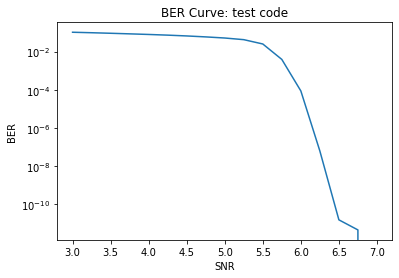

In [13]:
plt.plot(result["snrs"], result["bers"])
plt.yscale("log")
plt.title("BER Curve: test code")
plt.ylabel("BER")
plt.xlabel("SNR")
plt.show()